In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Dataset/Data_COVID19_Engl_sh_processed.csv')

### Hypothesis 2 

#### H(0) : There is no significant relationship betweenn demographic factors( age, martial status, sex, urban/rural) and self rated health status given by the patients. 

#### H(1) : There is a significant relationship betweenn demographic factors ( age, martial status, sex, urban/rural) and self rated health status given by the patients.

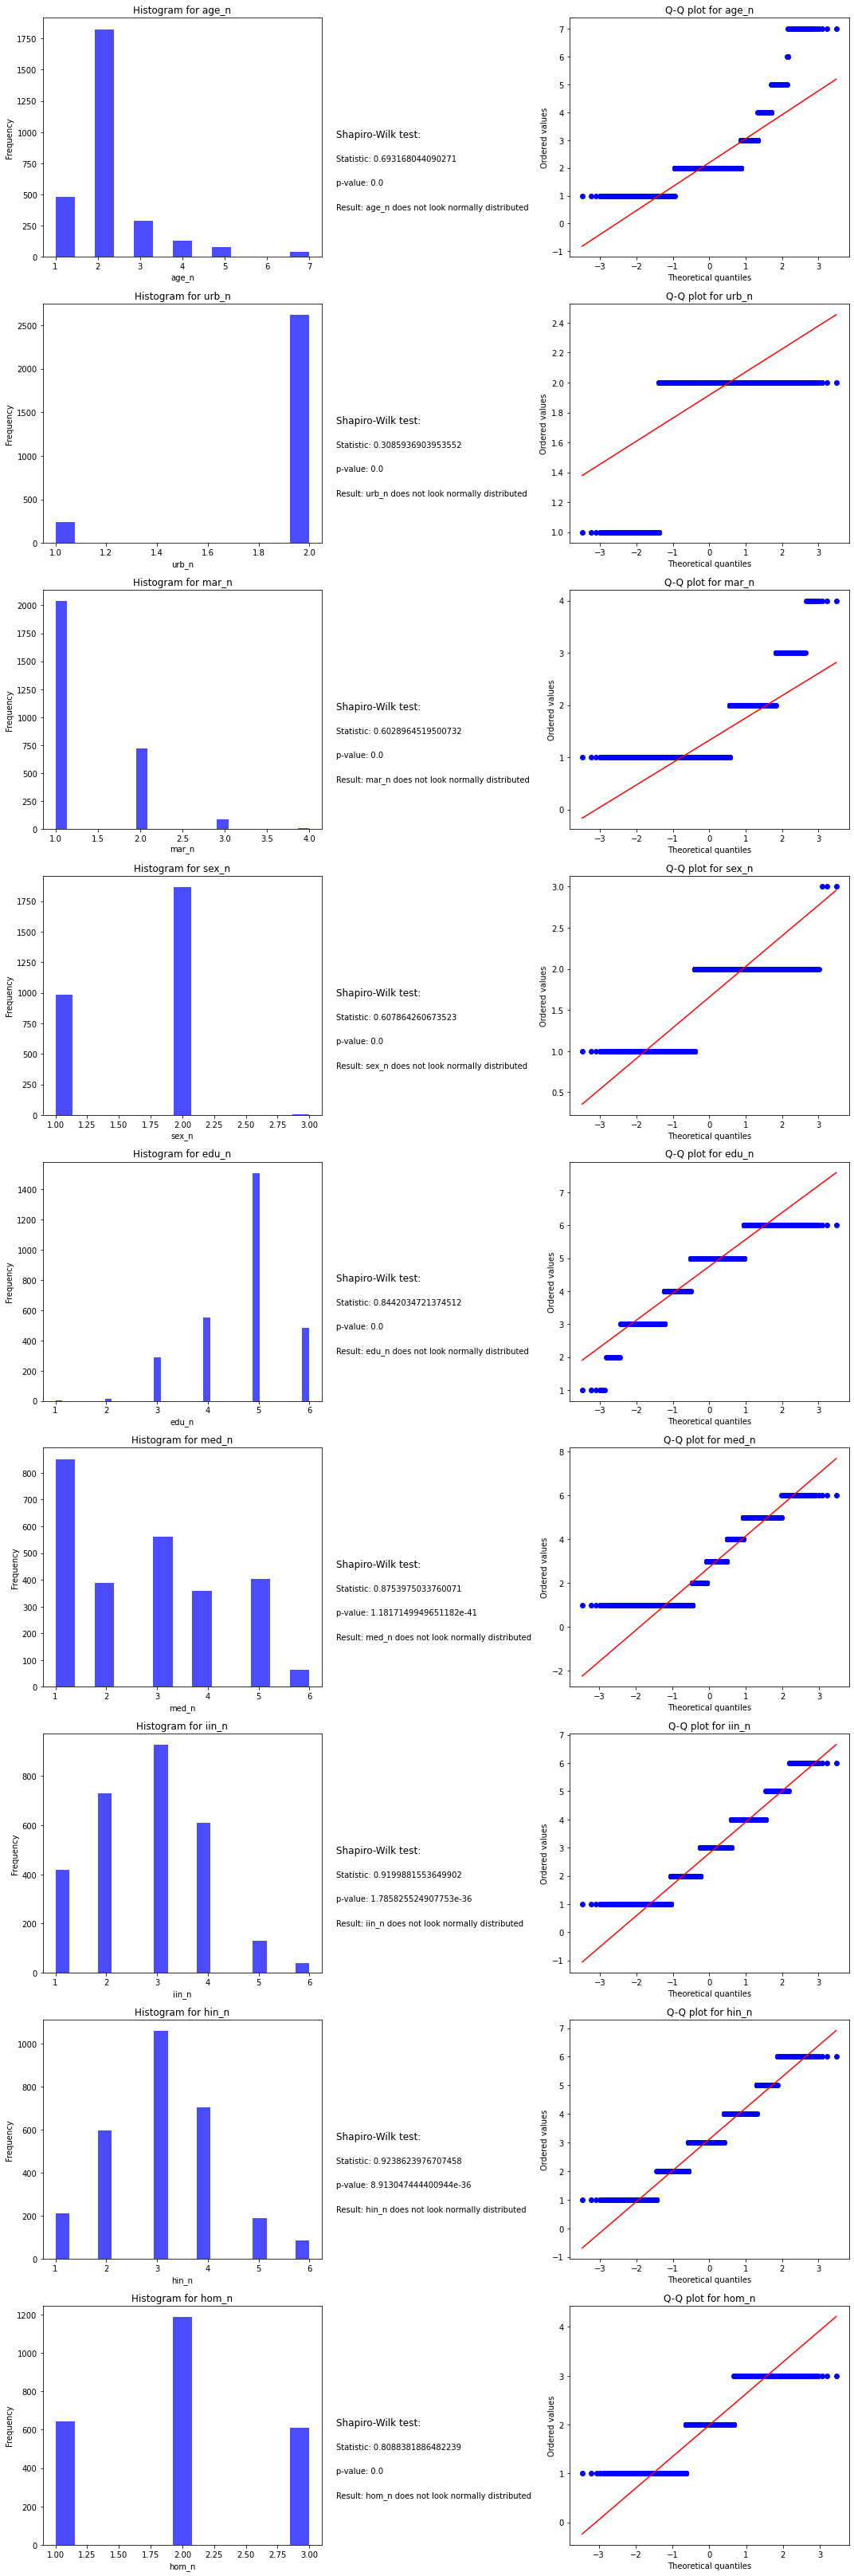

In [3]:
ordinal_variables = ['age_n', 'urb_n', 'mar_n', 'sex_n', 'edu_n',
                     'med_n', 'iin_n', 'hin_n', 'hom_n']


def checkNormality(data, variable, ax):
    # Drop missing values
    data = data.dropna(subset=[variable])

    # Perform Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data[variable])

    # Check normality based on p-value
    if shapiro_p > 0.05:
        result = f'{variable} looks normally distributed'
    else:
        result = f'{variable} does not look normally distributed'

    # Plot histogram
    ax[0].hist(data[variable], bins='auto', color='blue', alpha=0.7)
    ax[0].set_title(f'Histogram for {variable}')
    ax[0].set_xlabel(variable)
    ax[0].set_ylabel('Frequency')

    # Plot Q-Q plot
    stats.probplot(data[variable], dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q plot for {variable}')
    ax[1].set_xlabel('Theoretical quantiles')
    ax[1].set_ylabel('Ordered values')

    # Add text for Shapiro-Wilk test results
    ax[0].text(1.05, 0.5, f"Shapiro-Wilk test:",
               fontsize=12, transform=ax[0].transAxes)
    ax[0].text(1.05, 0.4, f"Statistic: {shapiro_stat}",
               fontsize=10, transform=ax[0].transAxes)
    ax[0].text(1.05, 0.3, f"p-value: {shapiro_p}",
               fontsize=10, transform=ax[0].transAxes)
    ax[0].text(1.05, 0.2, f"Result: {result}",
               fontsize=10, transform=ax[0].transAxes)


# Create subplots
fig, axs = plt.subplots(len(ordinal_variables), 2,
                        figsize=(15, 5*len(ordinal_variables)))

# Loop through each ordinal variable and plot histograms and Q-Q plots
for i, variable in enumerate(ordinal_variables):
    checkNormality(data, variable, axs[i])

plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import levene


def check_homogeneity_variances(data, factor_column, dependent_column):
    groups = data.groupby(factor_column)[dependent_column]
    levene_results = stats.levene(*[group for name, group in groups])
    if levene_results.pvalue > 0.05:
        result = f'Homogeneity of variances assumption is met for {factor_column}'
    else:
        result = f'Homogeneity of variances assumption is not met for {factor_column}'

    print(result)


for column in ordinal_variables:
    check_homogeneity_variances(data, column, 'srh_n')


Homogeneity of variances assumption is not met for age_n
Homogeneity of variances assumption is met for urb_n
Homogeneity of variances assumption is not met for mar_n
Homogeneity of variances assumption is met for sex_n
Homogeneity of variances assumption is not met for edu_n
Homogeneity of variances assumption is met for med_n
Homogeneity of variances assumption is not met for iin_n
Homogeneity of variances assumption is not met for hin_n
Homogeneity of variances assumption is not met for hom_n


In [5]:
from scipy import stats


def kruskal_wallis_test(data, factor_column, dependent_column):
    groups = [group[1]
              for group in data.groupby(factor_column)[dependent_column]]
    kruskal_results = stats.kruskal(*groups)
    if kruskal_results.pvalue < 0.05:
        result = f'The groups are significantly different for {dependent_column}'
    else:
        result = f'The groups are not significantly different for {dependent_column}'
    return kruskal_results, result


ordinal_variables = ['age_n', 'sex_n', 'mar_n', 'urb_n', 'edu_n', 'med_n', 'iin_n', 'hin_n', 'hom_n']
result_table = pd.DataFrame(columns=['factor','p-value', 'Result'])
for column in ordinal_variables:
    kruskal_results, result = kruskal_wallis_test(data, column, 'srh_n')
    res = ""
    if kruskal_results.pvalue < 0.05:
        res = 'Reject H0'
    else:
        res = 'Fail to reject H0'

    result_table.loc[len(result_table)] = [column, kruskal_results.pvalue, res]
result_table


,factor,p-value,Result
0,age_n,1.728047e-12,Reject H0
1,sex_n,2.280859e-17,Reject H0
2,mar_n,1.829332e-12,Reject H0
3,urb_n,7.376307e-01,Fail to reject H0
4,edu_n,1.448996e-07,Reject H0
5,med_n,1.940519e-02,Reject H0
6,iin_n,6.273135e-23,Reject H0
7,hin_n,1.999993e-14,Reject H0
8,hom_n,1.543757e-09,Reject H0


#### The Kruskal-Wallis test has produced a significant p-value for demographic factors other than urban/rural. This indicates that there is a significant relationship between at least one of these demographic factors. 

#### Based on this result, you can conclude that there is evidence to suggest that at least one of these demographic factors (age, sex, marital status, urban/rural, or education level) is associated with the variable under investigation (srh_n). In other words, there are differences in the distribution of srh_n across different levels of these demographic variables.

#### Further analysis, such as pairwise comparisons or post-hoc tests, may be conducted to determine which specific groups differ significantly from each other. Additionally, you may explore the nature and direction of these differences to gain a deeper understanding of the relationship between the demographic factors and the variable srh_n

In [6]:
import scikit_posthocs as sp

def posthoc_dunn(data, factor_columns, dependent_column):
    for column in factor_columns:
        dunn_results = sp.posthoc_dunn(data, val_col=dependent_column, group_col=column)
        print(f'Post-hoc Dunn test for {column}:')
        print(dunn_results)
        print('\n')

posthoc_dunn(data, ['age_n'], 'srh_n')


Post-hoc Dunn test for age_n:
              1         2             3             4         5         6  \
1  1.000000e+00  0.002845  1.279209e-08  3.997648e-08  0.000001  0.084269   
2  2.844919e-03  1.000000  1.944127e-05  1.815168e-05  0.000150  0.142622   
3  1.279209e-08  0.000019  1.000000e+00  2.761349e-01  0.194501  0.320680   
4  3.997648e-08  0.000018  2.761349e-01  1.000000e+00  0.721666  0.428601   
5  1.250273e-06  0.000150  1.945008e-01  7.216663e-01  1.000000  0.484139   
6  8.426938e-02  0.142622  3.206803e-01  4.286009e-01  0.484139  1.000000   
7  4.586948e-02  0.284747  5.176027e-01  2.099014e-01  0.153386  0.253343   

          7  
1  0.045869  
2  0.284747  
3  0.517603  
4  0.209901  
5  0.153386  
6  0.253343  
7  1.000000  




In [7]:
posthoc_results = []
def posthoc_dunn(data, factor_column, name):
    # rempve missing values or nan values
    data = data.dropna(subset=[factor_column, 'srh_n'])
    dunn_results = sp.posthoc_dunn(data, val_col='srh_n', group_col=factor_column)
    print(f'Post-hoc Dunn test for {name}:')
    print(dunn_results)
    print('\n')
    posthoc_results.append(dunn_results)
    # plt.figure(figsize=(5, 5))
    # sp.sign_plot(dunn_results, **{'vmin': 0, 'vmax': 0.05})
    # plt.title('Post-hoc Dunn test for ' + name)
    # plt.xlabel(name)
    # plt.ylabel(name)
    # plt.show()
    
posthoc_dunn(data, 'age_n', 'Age Groups')
posthoc_dunn(data, 'edu_n', 'Education Levels')
posthoc_dunn(data, 'mar_n', 'Marital Status')
posthoc_dunn(data, 'sex_n', 'Sex ')
posthoc_dunn(data, 'iin_n', 'Income Levels')
posthoc_dunn(data, 'hin_n', 'Previous Income Levels')

Post-hoc Dunn test for Age Groups:
              1         2             3             4         5         6  \
1  1.000000e+00  0.002845  1.279209e-08  3.997648e-08  0.000001  0.084269   
2  2.844919e-03  1.000000  1.944127e-05  1.815168e-05  0.000150  0.142622   
3  1.279209e-08  0.000019  1.000000e+00  2.761349e-01  0.194501  0.320680   
4  3.997648e-08  0.000018  2.761349e-01  1.000000e+00  0.721666  0.428601   
5  1.250273e-06  0.000150  1.945008e-01  7.216663e-01  1.000000  0.484139   
6  8.426938e-02  0.142622  3.206803e-01  4.286009e-01  0.484139  1.000000   
7  4.586948e-02  0.284747  5.176027e-01  2.099014e-01  0.153386  0.253343   

          7  
1  0.045869  
2  0.284747  
3  0.517603  
4  0.209901  
5  0.153386  
6  0.253343  
7  1.000000  


Post-hoc Dunn test for Education Levels:
          1.0       2.0           3.0           4.0       5.0           6.0
1.0  1.000000  0.172250  3.548156e-01  2.734842e-01  0.180762  5.948616e-02
2.0  0.172250  1.000000  2.986119e-01  4.

#### Age Groups:
Age groups 1, 2, 3, 4, and 5 are significantly different from each other (p < 0.05), except for group 1 with group 6 (p = 0.084269).
Groups 1, 2, 3, and 4 are significantly different from group 7 (p < 0.05).
#### Education Levels:
Education levels 1, 2, 3, 4, and 5 are significantly different from each other (p < 0.05), except for some exceptions.
For example, there are no significant differences between levels 1 and 6, and between levels 2 and 5.
#### Marital Status:
Marital statuses 1, 2, and 3 are significantly different from each other (p < 0.05), but not from status 4.
Status 4 does not show significant differences from any other status.
#### Sex:
There are significant differences between sexes 1 and 2 (p < 0.05), but not between sex 3 and either 1 or 2.
#### Income Levels:
There are significant differences between income levels for most comparisons (p < 0.05), indicating that different income groups have different self-rated health statuses.
#### Previous Income Levels:
Similar to income levels, previous income levels also show significant differences for most comparisons (p < 0.05).


For some comparisons (e.g., between age groups 1 and 2, age groups 1 and 5), the p-values are less than 0.05, indicating a significant difference in self-rated health between those age groups.
For other comparisons (e.g., between age groups 1 and 3, age groups 1 and 4), the p-values are greater than 0.05, suggesting no significant difference in self-rated health between those age groups.

The p-values in the matrix generally decrease as the age groups become more dissimilar. For example, the comparison between age groups 1 and 5 yields a smaller p-value compared to the comparison between age groups 1 and 3, indicating a greater difference in self-rated health between age groups 1 and 5.

##### Based on these results, it's evident that demographic factors such as age, education, marital status, sex, income, and previous income levels are significantly associated with self-rated health status.

In [8]:

effect_sizes = {}

# Loop through each post-hoc result for different variables
for i, factor_column in enumerate(['age_n', 'edu_n', 'mar_n', 'sex_n']):
    # Extract the post-hoc result for the current variable
    dunn_results = posthoc_results[i]

    mean_effect_size = dunn_results.mean().mean()
    effect_sizes[factor_column] = mean_effect_size

    # Print or visualize the effect sizes for each variable
print("Effect sizes or mean rank differences:")
for factor_column, effect_size in effect_sizes.items():
    print(f"{factor_column}: {effect_size}")


Effect sizes or mean rank differences:
age_n: 0.31104071112061954
edu_n: 0.3622380085835692
mar_n: 0.5638348552607672
sex_n: 0.4253908894713076


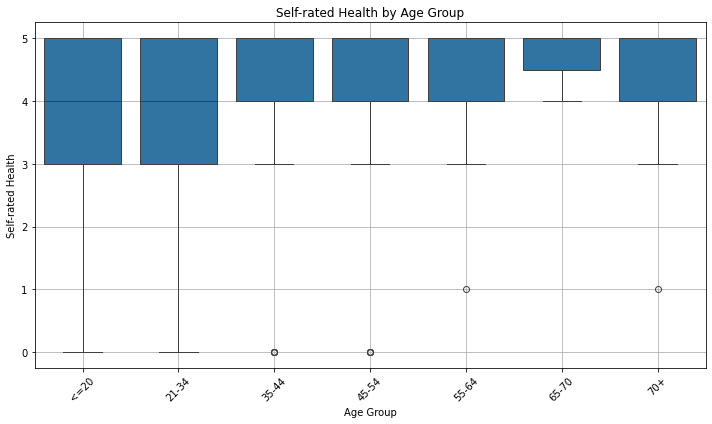

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age groups and their labels
age_groups = [1, 2, 3, 4, 5, 6, 7]
age_group_labels = ['<=20', '21-34', '35-44', '45-54', '55-64', '65-70', '70+']

# Plotting box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_n', y='srh_n', data=data, order=age_groups)
plt.xlabel('Age Group')
plt.ylabel('Self-rated Health')
plt.xticks(ticks=range(len(age_groups)), labels=age_group_labels, rotation=45)
plt.title('Self-rated Health by Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()
